In [2]:
pip install statsmodels

     |████████████████████████████████| 10.8MB 6.8MB/s eta 0:00:01
     |████████████████████████████████| 235kB 97.4MB/s eta 0:00:01
     |████████████████████████████████| 38.6MB 63.6MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fosforml

     |████████████████████████████████| 51kB 5.0MB/s eta 0:00:011
     |████████████████████████████████| 10.9MB 11.2MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 93.3MB/s eta 0:00:01
     |████████████████████████████████| 307kB 82.6MB/s eta 0:00:01
     |████████████████████████████████| 133kB 89.8MB/s eta 0:00:01
     |████████████████████████████████| 81kB 25.4MB/s eta 0:00:01
     |████████████████████████████████| 98.7MB 250kB/s  eta 0:00:01
     |████████████████████████████████| 61kB 20.2MB/s eta 0:00:01
     |████████████████████████████████| 39.9MB 74.0MB/s eta 0:00:01
     |████████████████████████████████| 174kB 89.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 21.7MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 100.2MB/s eta 0:00:01
     |████████████████████████████████| 200.3MB 120kB/s s eta 0:00:01
     |████████████████████████████████| 2.5MB 74.4MB/s eta 0:00:01
     |████████████████████████████████| 51kB 20.1MB/s eta 0

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
 
table_name = '"FACT_CUSTOMER_ORDERS"'
 
sf_df = my_session.sql("select * from {}".format(table_name))
df = sf_df.to_pandas()

In [6]:
df.columns

Index(['ORDER_ID', 'PRODUCT_ID', 'ORDER_QTY', 'ORDER_DATE'], dtype='object')

In [7]:
data = df[['PRODUCT_ID','ORDER_DATE','ORDER_QTY']]

In [9]:
# Convert 'order_date' to datetime
data['ORDER_DATE']=pd.to_datetime(data['ORDER_DATE'])

In [25]:
# Aggregate the data by date and sum the quantities
daily_data = data.groupby('ORDER_DATE')['ORDER_QTY'].sum().reset_index()

In [26]:
# Set 'order_date' as the index
daily_data.set_index('ORDER_DATE', inplace=True)

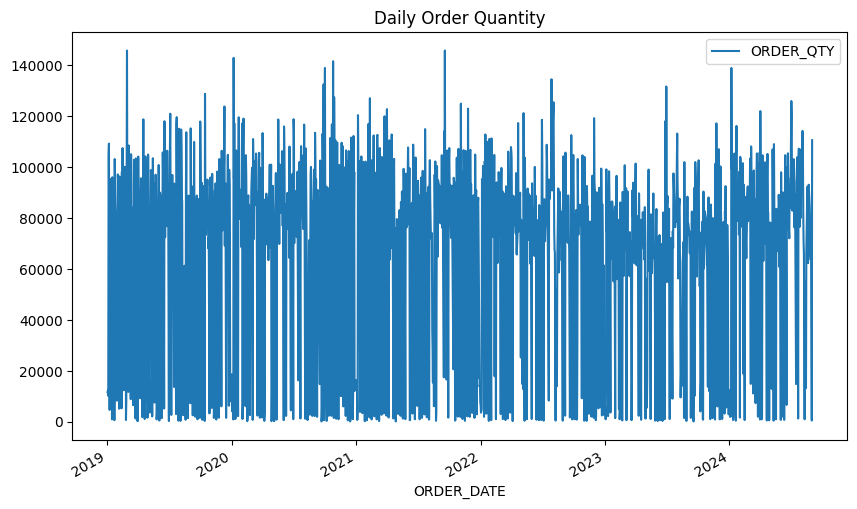

In [27]:
# Plot the data
daily_data.plot(figsize=(10, 6))
plt.title('Daily Order Quantity')
plt.show()

In [30]:
# Check for stationarity
result = adfuller(daily_data['ORDER_QTY'])
print('ADF Statistic:', result)
print('p-value:', result)

ADF Statistic: (-7.601719673225109, 2.3795985042879176e-11, 22, 1709, {'1%': -3.4341821529051706, '5%': -2.8632326806210284, '10%': -2.567671137303252}, 40187.257641795484)
p-value: (-7.601719673225109, 2.3795985042879176e-11, 22, 1709, {'1%': -3.4341821529051706, '5%': -2.8632326806210284, '10%': -2.567671137303252}, 40187.257641795484)


In [31]:
# Differencing to make the series stationary
data_diff = daily_data.diff().dropna()

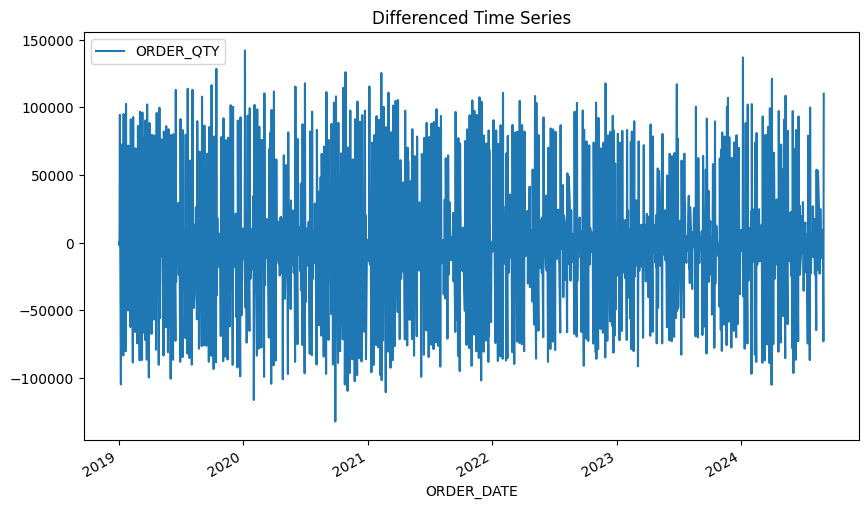

In [32]:
# Plot differenced series
data_diff.plot(figsize=(10, 6))
plt.title('Differenced Time Series')
plt.show()

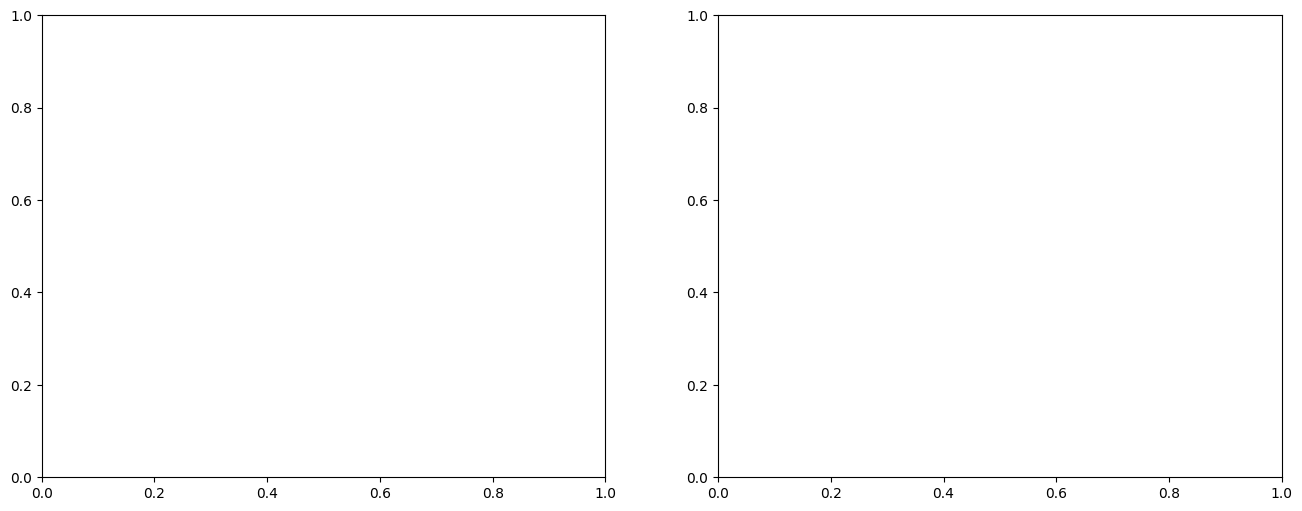

In [37]:
# Plot ACF and PACF
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plt.show()

In [40]:
plot_acf(data_diff, lags=40, ax=axes)
plot_pacf(data_diff, lags=40, ax=axes)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'figure'